# Analysis of 3 monthly returns - initial data (ratios only)

In [1]:
#General & Data transformation
import numpy as np
import pandas as pd 

#Plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Train test split
from sklearn.model_selection import train_test_split

#Pipeline and modeling
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import data
df = pd.read_csv('output/outputCopy.csv', sep=';')
df.head()

permno       adate       qdate public_date   CAPEI     bm     evm  \
0   10107  30.06.2005  30.09.2005  31.01.2006  33.861  0.176  15.245   
1   10107  30.06.2005  31.12.2005  28.02.2006  31.756  0.163  14.951   
2   10107  30.06.2005  31.12.2005  31.03.2006  31.820  0.163  14.951   
3   10107  30.06.2005  31.12.2005  30.04.2006  28.176  0.163  14.951   
4   10107  30.06.2005  31.03.2006  31.05.2006  25.921  0.151  15.120   

   pe_op_basic  pe_op_dil  pe_exi       ...        return3months  \
0       23.074     23.264  23.856       ...                  NaN   
1       21.496     21.846  22.392       ...                  NaN   
2       21.768     22.122  22.675       ...                  NaN   
3       19.320     19.634  20.125       ...                  NaN   
4       17.695     17.835  17.976       ...            -0.157052   

   return4months  return5months  return6months  return7months  return8months  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   return9months  return10months  return11months  return12months  
0            NaN             NaN             NaN             NaN  
1            NaN             NaN             NaN             NaN  
2            NaN             NaN             NaN             NaN  
3            NaN             NaN             NaN             NaN  
4            NaN             NaN             NaN             NaN  

[5 rows x 93 columns]

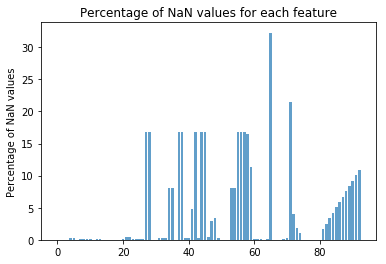

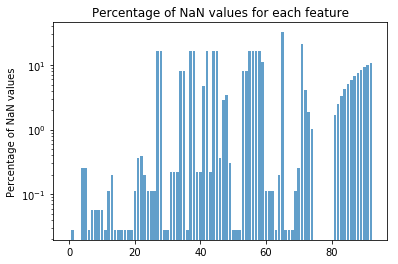

In [3]:
#NaN values check and show as bar chart

dfn = np.array(df)
yaxis = []
for i in df:
    yaxis.append((df[i].isnull().sum()/len(df[i]))*100)
    
xaxis = np.arange(0, len(df.columns))
#Graph1 linear scale
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values for each feature')
plt.show()

#Graph2 log scale
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.yscale('log')
plt.title('Percentage of NaN values for each feature')
plt.show()

  

##### Insert response column (stock goes up = 1 , stock goes down = 0)
decided that if the return is equal to 0 it is classified as negative, as there are still costs associated with trading

In [4]:
support_response_vector = []
#Trailing needs to be removed, to shift everything by one down -> no need to handle all companies first value, as it gets removed when cleaning for NaN values
for i in df['return3months']:
    if i <= 0: 
        support_response_vector.append(0)
    else:
        support_response_vector.append(1)
#for the 3 last values something needs to be added to have the correct length
support_response_vector.append(-1)
support_response_vector.append(-1)
support_response_vector.append(-1)
df['response'] = support_response_vector[3:]
#the extra added -1 line gets removed here again
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))
df = df.drop(len(df[1:]))


In [5]:
#print(df['response'])
df.to_csv('output/final2_3months_initialData.csv')

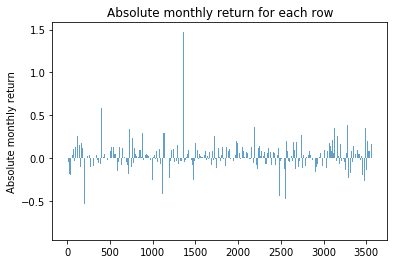

In [6]:
#Plotting the returns for the time period
support_returns_absolute = []
for i in df['return3months']:
    support_returns_absolute.append(i)

xaxis3 = np.arange(0, len(df['return3months']),1)
yaxis3 = support_returns_absolute

#Graph3 Returns linear scale
plt.bar(xaxis3, yaxis3, align='center', alpha=0.7)
plt.ylabel('Absolute monthly return')
plt.title('Absolute monthly return for each row')
plt.show()

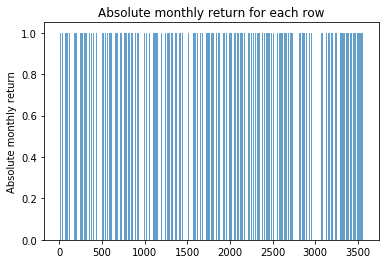

amount of 0: 1388
amount of 1: 2181
total amount of rows should be: 3569


(3569, 94)

In [7]:
#Plot the responses assigned in regards of the row
support_returns_classified= []
for i in df['response']:
    support_returns_classified.append(i)

xaxis4 = np.arange(0, len(df['response']),1)
yaxis4 = support_returns_classified

#Graph4 Returns-classified linear scale
plt.bar(xaxis4, yaxis4, align='center', alpha=0.7)
plt.ylabel('Absolute monthly return')
plt.title('Absolute monthly return for each row')
plt.show()

miss = 0
hits = 0
for a in yaxis4:
    if a == 1:
        hits += 1
    else:
        miss += 1
        
print('amount of 0: ' + str(miss))
print('amount of 1: ' + str(hits))

print('total amount of rows should be: ' + str(miss+hits))
df.shape

([<matplotlib.patches.Wedge at 0x1847bbbff28>,
 [Text(0.376172,1.03368,'Stock Down Next Period'),
  Text(-0.376172,-1.03368,'Stock Up Next Period')],
 [Text(0.205185,0.563826,'38.9%'), Text(-0.205185,-0.563826,'61.1%')])

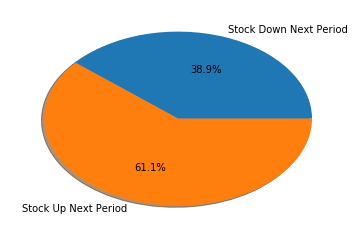

In [8]:
labels = 'Stock Down Next Period', 'Stock Up Next Period'
fracs = []
fracs.append(miss)
fracs.append(hits)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

Decided that, because of not a huge skew between the distribution we dont need to balance the set.

##### Dealing with NaN values in Columns
Decision: Drop everything where percentage of NaN > 5%

In [9]:
columns_to_drop = []
for i in df:
    if ((df[i].isnull().sum()/len(df[i]))*100) > 5:
        columns_to_drop.append(i)

print('Dropped columns: ')
print(columns_to_drop)
#update dataframe to remove columns
df = df.drop(columns_to_drop, axis = 1)

Dropped columns: 
['pretret_noa', 'pretret_earnat', 'int_debt', 'int_totdebt', 'invt_act', 'rect_act', 'curr_debt', 'profit_lct', 'ocf_lct', 'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio', 'cash_conversion', 'inv_turn', 'sale_nwc', 'PEG_trailing', 'return5months', 'return6months', 'return7months', 'return8months', 'return9months', 'return10months', 'return11months', 'return12months']


In [10]:
#Dropping the rows which are the 3 values of a companies data-set
rows_to_drop = []
z = 0
for i in df['permno']:
    
    if df.iloc[z][0] != df.iloc[z+2][0]:
        rows_to_drop.append(z)
        rows_to_drop.append(z+1)
        rows_to_drop.append(z+2)
        z += 1
    z += 1
    if z == len(df)-3:
        break

##### Dealing with NaN values in Rows
Decision: Drop everything where there are more than 0 NaN value

In [11]:
nan_row_numbers = df.isnull().sum(axis=1).tolist()
for i in range(0, len(nan_row_numbers)):
    if (nan_row_numbers[i]) > 0:
        rows_to_drop.append(i)
        
print('amount of rows dropped = ' + str(len(rows_to_drop)) + ' of ' + str(len(df)))

#update dataframe to remove rows
df = df.drop(rows_to_drop) 

amount of rows dropped = 729 of 3569


In [28]:
print('NaN values left in table: ' + str(df.isnull().sum().sum()))
df.head(110)

NaN values left in table: 0


CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps  \
31   19.236  0.144   9.729       14.140     14.594  14.594  14.594  4.124   
32   18.497  0.144   9.729       13.829     14.273  14.273  14.273  3.966   
33   15.335  0.144   9.729       11.570     11.941  11.941  11.941  3.288   
34   14.221  0.140  10.431       10.423     10.586  10.586  10.586  2.914   
35   13.663  0.140  10.431       10.021     10.178  10.178  10.178  2.800   
36   12.020  0.140  10.431        8.814      8.953   8.953   8.953  2.463   
37   10.944  0.200   9.051        8.455      8.636   8.636   8.636  2.317   
38   12.459  0.200   9.051        9.618      9.824   9.824   9.824  2.637   
39   13.743  0.200   9.051       10.607     10.834  10.834  10.834  2.909   
40   13.708  0.226   8.367       11.736     11.869  12.006  12.006  3.039   
41   15.612  0.226   8.367       13.354     13.506  13.661  13.661  3.461   
42   15.452  0.226   8.367       13.213     13.364  13.517  13.517  3.426   
43   15.432  0.187   9.463       14.939     15.030  15.216  15.216  3.759   
44   16.082  0.187   9.463       15.588     15.683  15.877  15.877  3.917   
45   17.298  0.187   9.463       16.806     16.909  17.117  17.117  4.213   
46   18.432  0.181   9.091       18.614     18.732  19.097  19.097  4.639   
47   18.956  0.181   9.091       19.291     19.414  19.792  19.792  4.770   
48   17.445  0.181   9.091       17.835     17.949  18.299  18.299  4.390   
49   17.365  0.166   9.138       15.332     15.582  15.840  15.840  4.284   
50   17.722  0.166   9.138       15.662     15.917  16.181  16.181  4.372   
51   18.480  0.166   9.138       16.329     16.595  16.870  16.870  4.560   
52   15.296  0.181   9.939       13.163     13.368  13.368  13.368  3.797   
53   13.470  0.181   9.939       11.740     11.922  11.922  11.922  3.344   
54   15.109  0.181   9.939       13.168     13.373  13.373  13.373  3.751   
55   13.071  0.233   7.703       11.016     11.121  11.174  11.174  3.250   
56   13.498  0.233   7.703       11.498     11.607  11.662  11.662  3.356   
57   14.685  0.233   7.703       12.519     12.637  12.698  12.698  3.651   
58   13.946  0.226   8.157       10.657     10.840  10.887  10.887  3.286   
59   15.136  0.226   8.157       11.776     11.979  12.030  12.030  3.566   
60   15.035  0.226   8.157       11.698     11.899  11.950  11.950  3.543   
..      ...    ...     ...          ...        ...     ...     ...    ...   
115  18.080  0.234  11.607       16.178     16.300  29.405  29.405  3.720   
116  18.360  0.234  11.607       16.454     16.577  29.905  29.905  3.777   
117  21.841  0.234  11.607       19.569     19.715  35.568  35.568  4.493   
125  23.336  0.170  14.647        9.646      9.646  10.292  10.292  4.383   
126  24.002  0.170  14.647        9.978      9.978  10.646  10.646  4.508   
127  23.682  0.175  14.403        9.914      9.914  10.421  10.421  4.507   
128  23.613  0.175  14.403        9.885      9.885  10.391  10.391  4.494   
129  24.705  0.175  14.403       10.336     10.336  10.865  10.865  4.702   
130  24.228  0.179  14.220       10.136     10.136  10.500  10.500  4.630   
131  24.963  0.179  14.220       10.444     10.444  10.818  10.818  4.770   
132  24.771  0.179  14.220       10.364     10.364  10.735  10.735  4.734   
133  23.371  0.157  15.784       21.512     21.512  21.611  21.611  4.487   
134  24.032  0.157  15.784       22.120     22.120  22.222  22.222  4.614   
135  26.069  0.157  15.784       24.051     24.051  24.162  24.162  5.005   
136  26.293  0.160  14.444       11.935     12.098  11.881  11.881  4.903   
137  25.956  0.160  14.444       11.782     11.943  11.729  11.729  4.840   
138  25.898  0.160  14.444       11.736     11.897  11.684  11.684  4.829   
139  26.358  0.168  14.682       11.742     11.846  11.951  11.951  4.745   
140  28.166  0.168  14.682       12.548     12.659  12.771  12.771  5.071   
141  30.235  0.168  14.682       13.485     13.604  13.724  13.724  5.443   
14

In [13]:
#Dropping unneccesary columns
columns_to_drop2 = ['permno','adate','qdate','public_date','PRC','dowjones','5yUSTreasuryBond','1yUSTreasuryBond','90dUSBills','USInflation','return1months','return2months','return3months','return4months']
df = df.drop(columns_to_drop2, axis = 1)


In [14]:
#Transforming divyield into decimals
support_divyield_vector = []
for i in df['divyield']:
    support_divyield_vector.append(i)

for b in range(0,len(support_divyield_vector)):
    #remove percentage sign, devide by 100 to get to decimal
    support = support_divyield_vector[b][:-1]
    support_divyield_vector[b] = round(float(support)/100,4)
    
df['divyield'] = support_divyield_vector

# Fitting & Algorithms

In [15]:
# assigning the columns except the last to variable X - features / assigning the last column to y - response
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [16]:
# Create a Pipeline object with Standard Scaler and SVC estimator

pipe = Pipeline ([('scaler', StandardScaler()), ('classifier', SVC(random_state=0))])

# Define parameter Grid
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [5, 10, 20, 100]},
              {'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='sigmoid')],
               'classifier__gamma': [1, 10],
               'classifier__C': [5, 10, 20, 100],
              'classifier__coef0': [0.1,0.2]},
             {'scaler': [StandardScaler(), None],
             'classifier': [LogisticRegression()],
             'classifier__C': [5, 10, 20, 100]},
             {'scaler': [StandardScaler()],
             'classifier': [DecisionTreeClassifier()],
             'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [ 5, 8, 10],
             'classifier__min_samples_split': [10, 500, 20] ,
             'classifier__min_samples_leaf': [1,2,3,4,5,6]},
             {'scaler': [StandardScaler()],
               'classifier': [neighbors.KNeighborsClassifier()],
               'classifier__n_neighbors': [5, 10, 15, 20, 25, 30]},
             {'scaler': [StandardScaler()],
             'classifier': [LDA(solver='lsqr')]},
             {'scaler': [StandardScaler()],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [5, 10, 15, 20, 30, 50],
             'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [ 5, 8, 10],
             'classifier__min_samples_split': [10, 500, 20] ,
             'classifier__min_samples_leaf': [1,2,3,4,5,6]}]

#run Grid search
grid= GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit model given best parameters
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'classifier': [SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001...'classifier__min_samples_split': [10, 500, 20], 'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
#Print out the best Score
print('Best CV accuracy: {: .2f}' .format(grid.best_score_))
#Print out score on Text Dataset
print('Test score: {: .2f}' .format(grid.score(X_test, y_test)))
#print the best parameters
print('Best parameters: {}' .format(grid.best_params_))

print(99*'-')

print('Performance: \n')
# Confusion Matrix
y_pred = grid.predict(X_test)
print('Confusion matrix: \n', metrics.confusion_matrix(y_test, y_pred))

# precision score
print('\nPrecision: {}' .format(round((metrics.precision_score(y_test, y_pred)),4)))
print('f1-score: {}' .format(round((metrics.f1_score(y_test, y_pred)),4)))

Best CV accuracy:  0.73
Test score:  0.71
Best parameters: {'classifier': SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 20, 'classifier__gamma': 1, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
---------------------------------------------------------------------------------------------------
Performance: 

Confusion matrix: 
 [[217 126]
 [124 395]]

Precision: 0.7582
f1-score: 0.7596


Confusion matrix, without normalization
[[217 126]
 [124 395]]
Normalized confusion matrix
[[0.63 0.37]
 [0.24 0.76]]


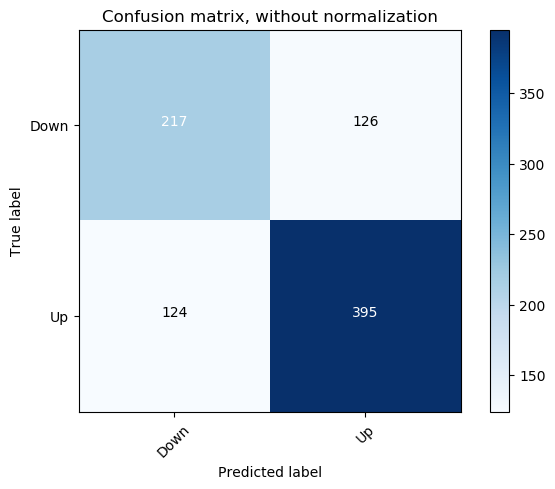

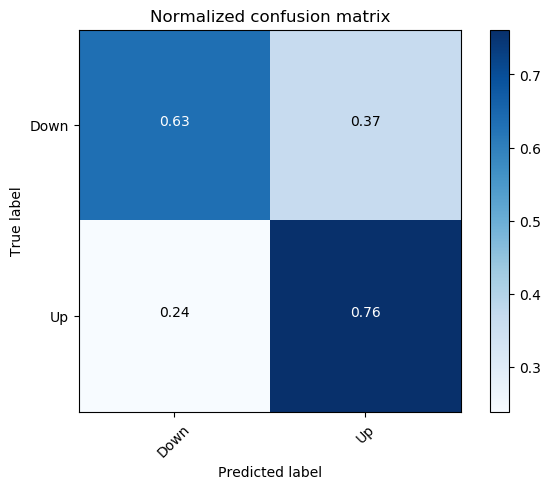

In [18]:
import itertools 
plt.style.use('default')
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Down', 'Up'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Down','Up'], normalize=True,
                      title='Normalized confusion matrix')

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Extract feature labels
feat_labels = df.columns[:-1]

# Create Random Forest object, fit data and
# extract feature importance attributes
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [20]:
# Sort output (by relative importance) and 
# print top 15 features
indices = np.argsort(importances)[::-1]
n = 15
for i in range(n):
    print('{0:2d}) {1:7s} {2:6.4f}'.format(i + 1, 
                                           feat_labels[indices[i]],
                                           importances[indices[i]]))

 1) PEG_1yrforward 0.0402
 2) CAPEI   0.0402
 3) divyield 0.0393
 4) pe_exi  0.0348
 5) PEG_ltgforward 0.0343
 6) pe_inc  0.0339
 7) pcf     0.0339
 8) ps      0.0333
 9) ptb     0.0309
10) pe_op_dil 0.0297
11) pe_op_basic 0.0271
12) bm      0.0257
13) evm     0.0205
14) aftret_invcapx 0.0205
15) debt_ebitda 0.0196


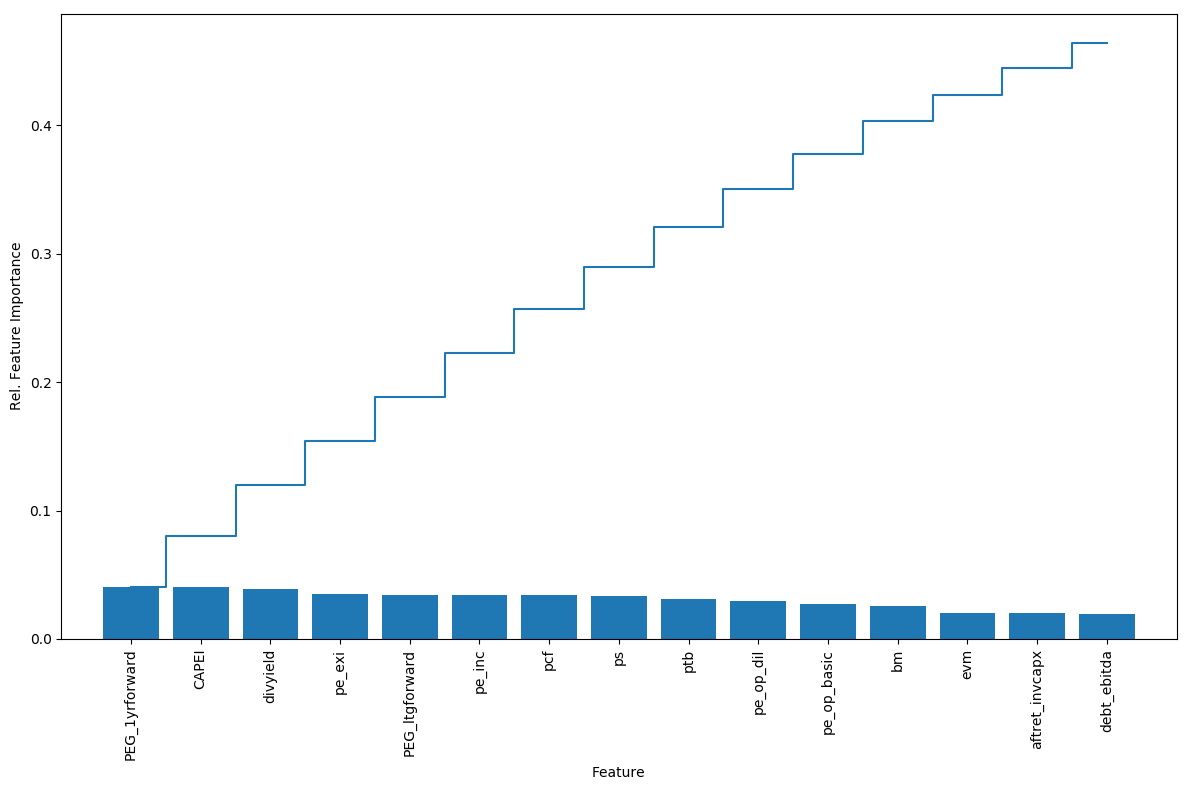

In [21]:
# Get cumsum of the n most important features
feat_imp = np.sort(importances)[::-1]
sum_feat_imp = np.cumsum(feat_imp)[:n]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 8))
plt.bar(range(n), importances[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Rel. Feature Importance')
plt.step(range(n), sum_feat_imp, where='mid', 
         label='Cumulative importance')
plt.tight_layout();

### PCA

In [22]:
from sklearn.decomposition import PCA

# Define no. of PC
q = 53

# Create PCA object and fit to find  
# first q principal components
pca = PCA(n_components=q)
pca.fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=53, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# Run PCA for all possible PCs
pca = PCA().fit(X_train)

# Define max no. of PC
q = X_train.shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]


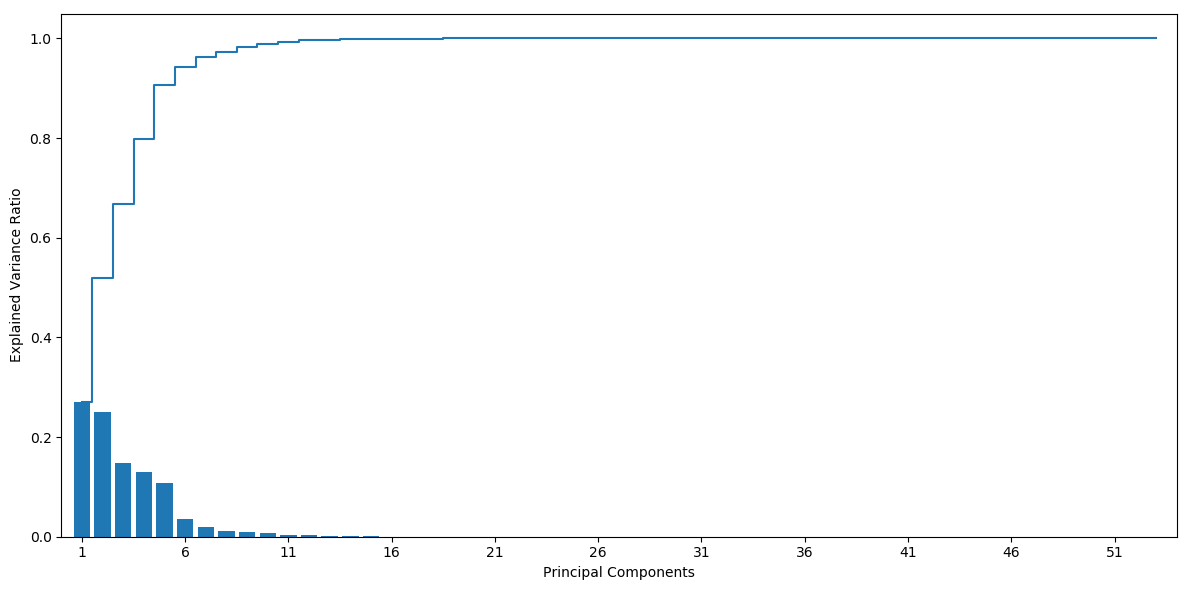

In [24]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.tight_layout();

### Decision Tree
Only included for graphical purpose, not used later on in the analysis.

In [25]:
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

feature_names = []
for i in df:
    feature_names.append(i)
    
feature_names = feature_names[:]

# Create decision tree object
dot_data = export_graphviz(tree, filled=True, rounded=True,
                           class_names=['Loss', 'BrEven'],
                           feature_names=feature_names[:-1], 
                           out_file=None)

# Visualize/Plot graph
graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'